In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline

In [287]:
df = pd.read_csv( r'D:/data_analytics_project/Online Retail Data set.csv', encoding= 'unicode_escape')

In [296]:
df 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [4]:
df.shape

(541909, 8)

In [5]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')

In [6]:
df['InvoiceDate'].dtype

dtype('<M8[ns]')

In [7]:
print(df['InvoiceDate'].dtype)


datetime64[ns]


In [8]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [9]:
extrem= df[(df['Quantity']==-80995.000000)|(df['Quantity']== 80995.000000)]

In [10]:
extrem # the dataset have extrem high values with opposite signs so it was necessary to investigate

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [12]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [13]:
#df['Description'].fillna('unknown',inplace= True)
df.fillna({'Description': 'unknown'}, inplace=True)

In [14]:
res= df[df['Description']=='unknown']

In [15]:
res

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,unknown,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,unknown,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,unknown,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,unknown,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,unknown,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,unknown,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,unknown,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,unknown,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,unknown,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [16]:
df.fillna({'CustomerID':-1}, inplace=True)

In [17]:
#res= df[df['Description']=='unknown']
#res  it is used to check that desired value is added in place of null values in customerid col(it is more like code reusability)

In [18]:
df.head(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [19]:
df.shape

(541909, 8)

In [20]:
df.drop_duplicates(keep='first',inplace=True)

In [21]:
df.shape# it means this dataset has duplicates now after removing dublicates it has this much rows 536641

(536641, 8)

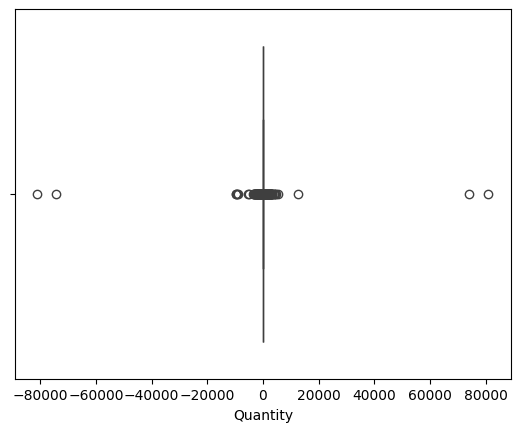

In [22]:

sns.boxplot(x="Quantity",data=df)
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_12420\3196584659.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Quantity'])


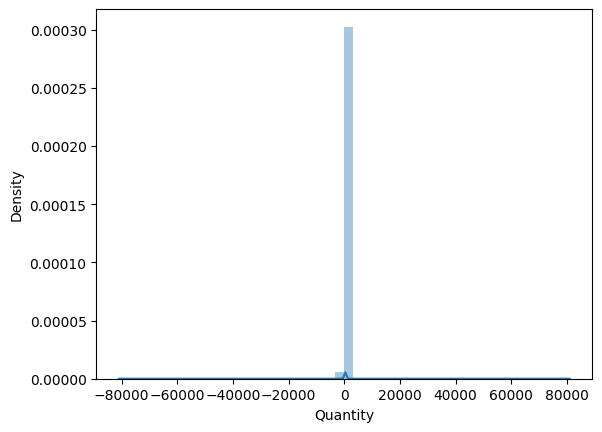

In [23]:
sns.distplot(df['Quantity'])
plt.show()

In [24]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,536641.000000,536641,536641.000000,536641.000000
mean,9.620029,2011-07-04 08:57:06.087421952,4.632656,11435.653019
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,-1.000000
25%,1.000000,2011-03-28 10:52:00,1.250000,-1.000000
50%,3.000000,2011-07-19 14:04:00,2.080000,14336.000000
75%,10.000000,2011-10-18 17:05:00,4.130000,16241.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,219.130156,NaN,97.233118,6795.467745


In [25]:
Q1=1.000000
Q3=10.000000	
IQR= Q3-Q1


In [26]:
min_range= Q1-(1.5*IQR)
max_range= Q3+(1.5*IQR)
min_range,max_range

(-12.5, 23.5)

In [27]:
newdf= df[(df['Quantity']>min_range) & (df['Quantity']<max_range)]  #df[(df['Quantity'] >= lower_bound) & (df['Quantity'] <= upper_bound)]

In [28]:
newdf.shape

(478140, 8)

C:\Users\admin\AppData\Local\Temp\ipykernel_12420\2162961398.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(newdf['Quantity'])


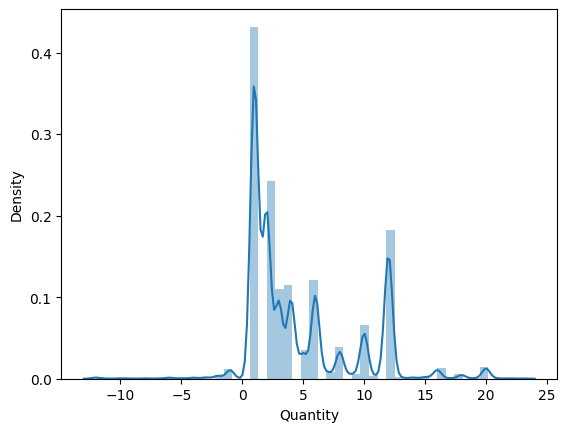

In [29]:
sns.distplot(newdf['Quantity'])
plt.show()

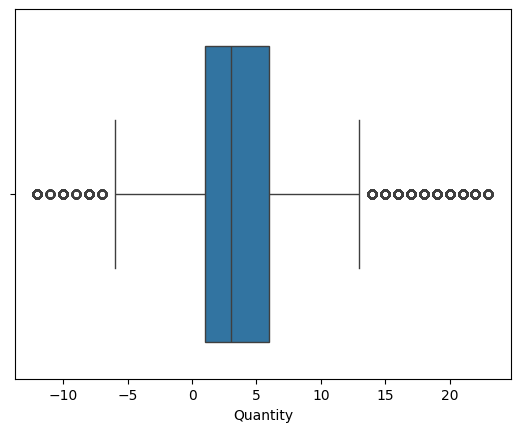

In [30]:
sns.boxplot(x="Quantity",data=newdf)
plt.show()

In [31]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,536641.000000,536641,536641.000000,536641.000000
mean,9.620029,2011-07-04 08:57:06.087421952,4.632656,11435.653019
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,-1.000000
25%,1.000000,2011-03-28 10:52:00,1.250000,-1.000000
50%,3.000000,2011-07-19 14:04:00,2.080000,14336.000000
75%,10.000000,2011-10-18 17:05:00,4.130000,16241.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,219.130156,NaN,97.233118,6795.467745


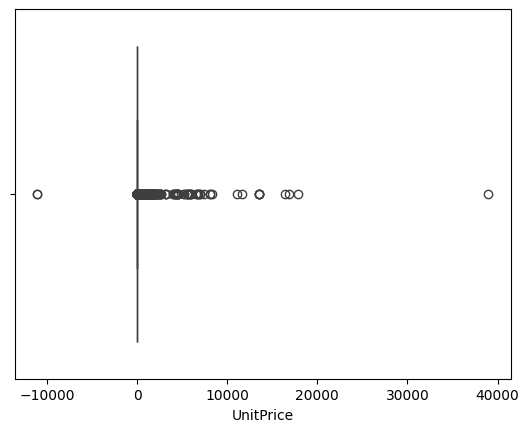

In [32]:
sns.boxplot(x="UnitPrice",data=newdf)
plt.show()

In [33]:
Q1=1.250000	
Q3=4.130000
IQR=Q3-Q1

In [34]:
min_range= Q1-(1.5*IQR)
max_range= Q3+(1.5*IQR)
min_range,max_range


(-3.0700000000000003, 8.45)

In [35]:
newdff= newdf[(newdf['UnitPrice']>min_range) & (newdf['UnitPrice']<max_range)] 

In [36]:
newdff.shape

(439135, 8)

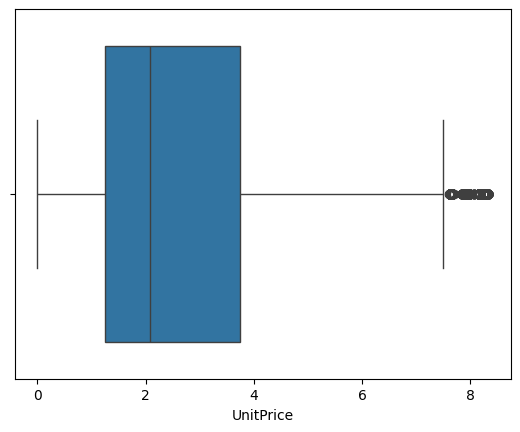

In [37]:
sns.boxplot(x="UnitPrice",data=newdff)
plt.show()

In [38]:
newdff.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,439135.000000,439135,439135.000000,439135.000000
mean,4.833596,2011-07-05 12:03:17.051157504,2.700595,11266.083601
min,-12.000000,2010-12-01 08:26:00,0.000000,-1.000000
25%,1.000000,2011-03-28 14:23:00,1.250000,-1.000000
50%,3.000000,2011-07-20 15:44:00,2.080000,14367.000000
75%,8.000000,2011-10-20 11:51:00,3.750000,16274.000000
max,23.000000,2011-12-09 12:50:00,8.330000,18287.000000
std,4.624864,NaN,1.932749,6929.288537


In [39]:
Q1=1.000000
Q3=10.000000	
IQR= Q3-Q1
min_range= Q1-(1.5*IQR)
max_range= Q3+(1.5*IQR)
min_range,max_range

(-12.5, 23.5)

In [40]:
outlierdf= df[(df['Quantity']<min_range) | (df['Quantity']>max_range)|(df['UnitPrice']<min_range) | (df['UnitPrice']>max_range)] #|(df['UnitPrice']<min_range) | (df['UnitPrice']>max_range)

In [41]:
outlierdf.shape

(61986, 8)

In [42]:
#common_rows= pd.merge(newdff,outlierdf,how='inner')

In [43]:
print("Unique rows in the outliers dataset:",outlierdf.shape[0])
print("Unique rows in the general dataset:",newdff.shape[0])



Unique rows in the outliers dataset: 61986
Unique rows in the general dataset: 439135


In [44]:
outlierdf.duplicated().sum()

np.int64(0)

In [45]:
newdff.duplicated().sum()

np.int64(0)

In [46]:
df.shape

(536641, 8)

In [47]:
outlierdf.head(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01 08:45:00,0.85,12583.0,France
...,...,...,...,...,...,...,...,...
410,536404,21975,PACK OF 60 DINOSAUR CAKE CASES,24,2010-12-01 11:29:00,0.55,16218.0,United Kingdom
414,536404,22296,HEART IVORY TRELLIS LARGE,24,2010-12-01 11:29:00,1.65,16218.0,United Kingdom
415,536405,20914,SET/5 RED RETROSPOT LID GLASS BOWLS,128,2010-12-01 11:32:00,2.55,14045.0,United Kingdom
431,536406,22803,IVORY EMBROIDERED QUILT,2,2010-12-01 11:33:00,35.75,17850.0,United Kingdom


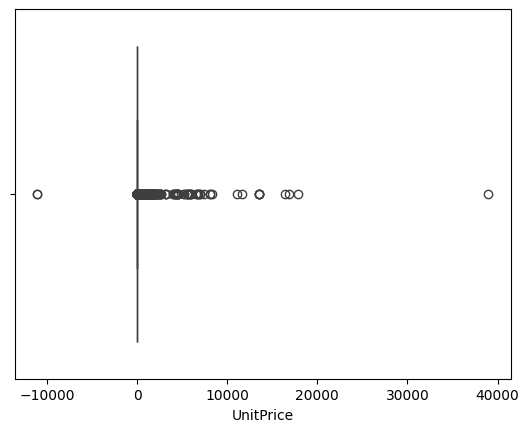

In [48]:
sns.boxplot(x='UnitPrice',data= outlierdf)
plt.show()

In [49]:
outlierdf= outlierdf[outlierdf['UnitPrice']>=0]

In [50]:
outlierdf.shape

(61984, 8)

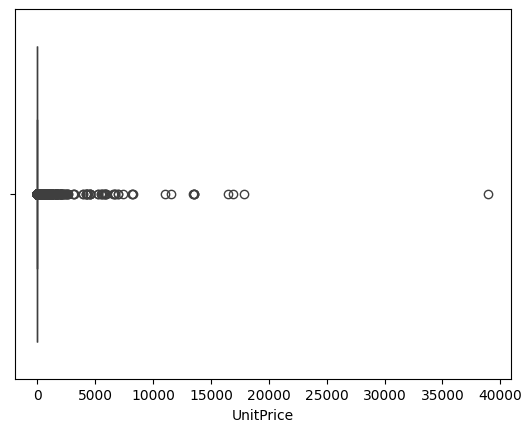

In [51]:
sns.boxplot(x='UnitPrice',data= outlierdf)
plt.show()

In [52]:
#now we have two datasets one is for general insifhts 'newdff' and another one is 'outlierdf' for outliers can include seasonalsale,vip customer

In [53]:
newdff.head(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [54]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format= '%d-%m-%Y  %H:%M')


In [55]:
print(newdff['Country'].shape)

(439135,)


In [56]:
newdff.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom


In [57]:
print(newdff['CustomerID'].isnull().sum())

0


In [58]:
print(newdff['InvoiceNo'].isnull().sum())

0


In [59]:
# Reset the index if needed
newdff.reset_index(drop=True, inplace=True)


In [60]:
identified_cust= newdff[newdff['CustomerID']>-1]

In [61]:
uniden=newdff[newdff['CustomerID']==-1]

In [62]:
uniden['CustomerID']

1116     -1.0
1117     -1.0
1118     -1.0
1119     -1.0
1120     -1.0
         ... 
438851   -1.0
438852   -1.0
438853   -1.0
438854   -1.0
438855   -1.0
Name: CustomerID, Length: 116575, dtype: float64

In [63]:
identified_cust['CustomerID'].count()

np.int64(322560)

In [64]:
identified_cust.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322560 entries, 0 to 439134
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    322560 non-null  object        
 1   StockCode    322560 non-null  object        
 2   Description  322560 non-null  object        
 3   Quantity     322560 non-null  int64         
 4   InvoiceDate  322560 non-null  datetime64[ns]
 5   UnitPrice    322560 non-null  float64       
 6   CustomerID   322560 non-null  float64       
 7   Country      322560 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 22.1+ MB


In [65]:
newdff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439135 entries, 0 to 439134
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    439135 non-null  object        
 1   StockCode    439135 non-null  object        
 2   Description  439135 non-null  object        
 3   Quantity     439135 non-null  int64         
 4   InvoiceDate  439135 non-null  datetime64[ns]
 5   UnitPrice    439135 non-null  float64       
 6   CustomerID   439135 non-null  float64       
 7   Country      439135 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 26.8+ MB


In [75]:
newdff['Total_spending']=newdff['Quantity'] * newdff['UnitPrice']
customer_spending= newdff.groupby('CustomerID')['Total_spending'].sum()
print(customer_spending)

CustomerID
-1.0        838188.95
 12347.0      2866.77
 12348.0        17.00
 12349.0      1155.75
 12350.0       274.00
              ...    
 18280.0       160.70
 18281.0        46.92
 18282.0       111.68
 18283.0      2002.63
 18287.0       571.48
Name: Total_spending, Length: 4200, dtype: float64


C:\Users\admin\AppData\Local\Temp\ipykernel_12420\308204589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdff['Total_spending']=newdff['Quantity'] * newdff['UnitPrice']


In [208]:
customer_order_da=  newdff.groupby('CustomerID').agg(
    total_order_value=('Total_spending', 'sum'),
    total_orders=('InvoiceNo', 'nunique')
)
customer_order_da.head(1)

,total_order_value,total_orders
CustomerID,,
-1.0,838188.95,2341


In [210]:
regular_customer= customer_order_da[customer_order_da['total_orders'] > 1]


In [214]:
regular_customer.head(1) 

,total_order_value,total_orders
CustomerID,,
-1.0,838188.95,2341


In [283]:
regular_cust_df= regular_customer.reset_index()
regular_cust_df.head()

,CustomerID,total_order_value,total_orders
0,-1.0,838188.95,2341
1,12347.0,2866.77,7
2,12352.0,1027.11,8
3,12356.0,444.56,2
4,12358.0,456.36,2


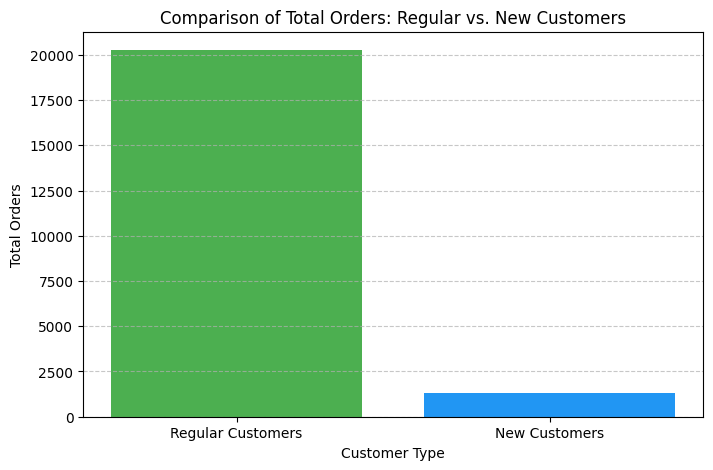

In [285]:

# Step 1: Calculate total orders for each customer group
regular_total_orders = regular_cust_df['total_orders'].sum()
new_total_orders = new_cust['total_orders'].sum()

# Step 2: Create a DataFrame for visualization
order_data = {
    'Customer Type': ['Regular Customers', 'New Customers'],
    'Total Orders': [regular_total_orders, new_total_orders]
}
order_df = pd.DataFrame(order_data)

# Step 3: Plotting the bar chart
plt.figure(figsize=(8, 5))
plt.bar(order_df['Customer Type'], order_df['Total Orders'], color=['#4caf50', '#2196f3'])
plt.xlabel('Customer Type')
plt.ylabel('Total Orders')
plt.title('Comparison of Total Orders: Regular vs. New Customers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [212]:
new_cust=customer_order_da[customer_order_da['total_orders'] == 1] 

In [213]:
new_cust

,total_order_value,total_orders
CustomerID,,
12348.0,17.00,1
12349.0,1155.75,1
12350.0,274.00,1
12353.0,29.30,1
12354.0,651.55,1
...,...,...
18262.0,117.32,1
18277.0,103.42,1
18278.0,173.90,1


In [117]:
customer_segments=pd.cut(customer_spending, bins=[0,100,500,1000,float('inf')],labels=['Low','Medium','High','Very High'])
print(customer_segments.value_counts())

Total_spending
Medium       1822
Very High    1051
High          808
Low           474
Name: count, dtype: int64


In [ ]:
# percentage of cust for each segments medium 43%,very high 25%, high 19%,low 11%

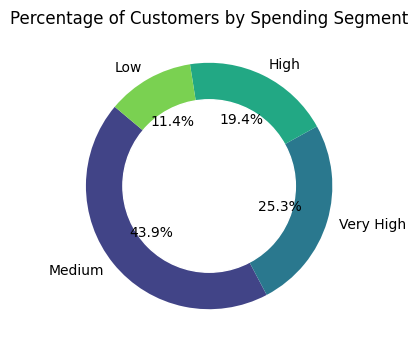

In [294]:
# Count the number of customers in each segment
segment_counts = customer_segments.value_counts()

# Convert counts to percentages
segment_percentages = (segment_counts / segment_counts.sum()) * 100

# Plotting
plt.figure(figsize=(4, 4))
plt.pie(segment_percentages, labels=segment_percentages.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(segment_percentages)))

# Draw a white circle at the center to create the donut shape
center_circle = plt.Circle((0, 0), 0.70, color='white')
plt.gca().add_artist(center_circle)

# Set title
plt.title('Percentage of Customers by Spending Segment')

# Display
plt.show()



C:\Users\admin\AppData\Local\Temp\ipykernel_12420\3497106679.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_spending_segmented = customer_spending.groupby(customer_segments).sum()


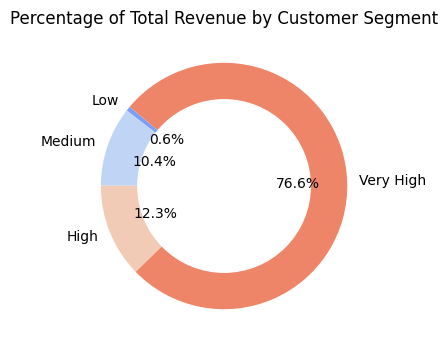

In [292]:
# Calculate revenue by segment
customer_spending_segmented = customer_spending.groupby(customer_segments).sum()

# Convert revenue values to percentages
revenue_percentages = (customer_spending_segmented / customer_spending_segmented.sum()) * 100

# Plotting the donut chart
plt.figure(figsize=(4, 4))
plt.pie(revenue_percentages, labels=revenue_percentages.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('coolwarm', len(revenue_percentages)))

# Draw a white circle at the center to create the donut effect
center_circle = plt.Circle((0, 0), 0.70, color='white')
plt.gca().add_artist(center_circle)

# Set the title
plt.title('Percentage of Total Revenue by Customer Segment')
plt.show()

In [77]:
# Group by month or year and calculate total sales
#newdff['MonthYear'] = newdff['InvoiceDate'].dt.to_period('M')''' .dt is a special accessor in Pandas for datetime-like properties.
#It allows you to extract various components like the year, month, day, hour, and so on.
#.dt.to_period('M'):

#The to_period('M') function converts the datetime values into a period.
#By passing 'M', you are specifically telling Pandas to convert the dates into monthly periods. So, it converts each date to just year and month. '''
#monthly_sales = newdff.groupby('MonthYear')['Total_Spending'].sum()
#print(monthly_sales). # this is for explanation dont run this script(warning)

In [78]:
newdff['monthyear']= newdff['InvoiceDate'].dt.to_period('M')

C:\Users\admin\AppData\Local\Temp\ipykernel_12420\1628629920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdff['monthyear']= newdff['InvoiceDate'].dt.to_period('M')


In [79]:
newdff['monthyear'].dtype

period[M]

In [80]:
monthly_sales=  newdff.groupby('monthyear')['Total_spending'].sum()

In [81]:
print(monthly_sales)

monthyear
2010-12    339813.740
2011-01    278049.740
2011-02    239189.210
2011-03    311367.920
2011-04    251771.221
2011-05    349407.510
2011-06    312682.920
2011-07    320420.671
2011-08    323714.060
2011-09    470042.982
2011-10    529987.160
2011-11    693366.340
2011-12    210863.330
Freq: M, Name: Total_spending, dtype: float64


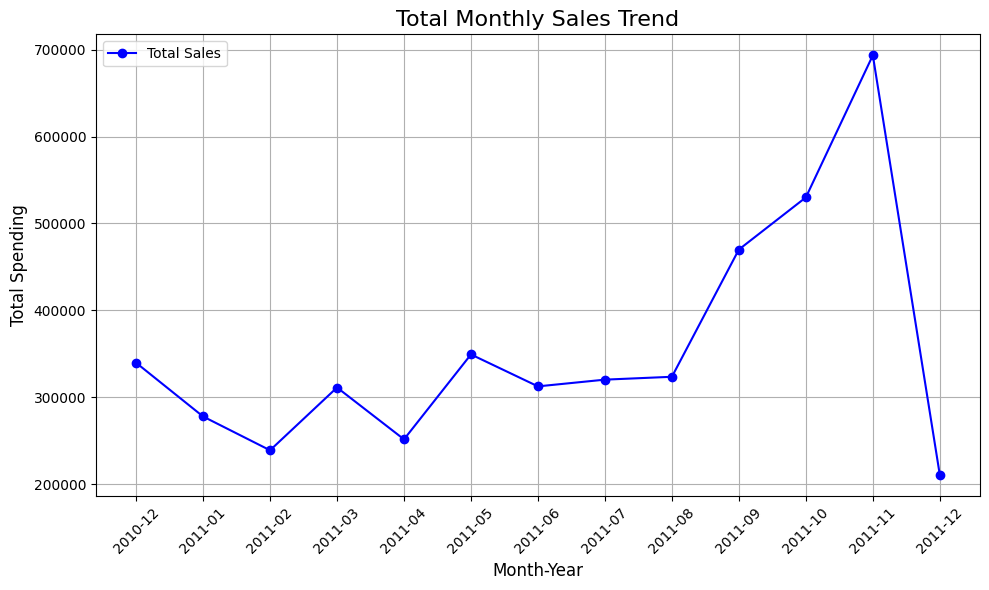

In [83]:
plt.figure(figsize=(10, 6))

# Plot the line for monthly sales
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', color='b', label='Total Sales')

# Add title and labels
plt.title('Total Monthly Sales Trend', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Spending', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid for better readability
plt.grid(True)

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [84]:
newdff['yearly']= newdff['InvoiceDate'].dt.to_period('Y')


C:\Users\admin\AppData\Local\Temp\ipykernel_12420\3180027421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdff['yearly']= newdff['InvoiceDate'].dt.to_period('Y')


In [85]:
Yearly_sales= newdff.groupby('yearly')['Total_spending'].sum()

In [86]:
print(Yearly_sales)

yearly
2010     339813.740
2011    4290863.064
Freq: Y-DEC, Name: Total_spending, dtype: float64


In [87]:
newdff.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_spending,monthyear,yearly
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010


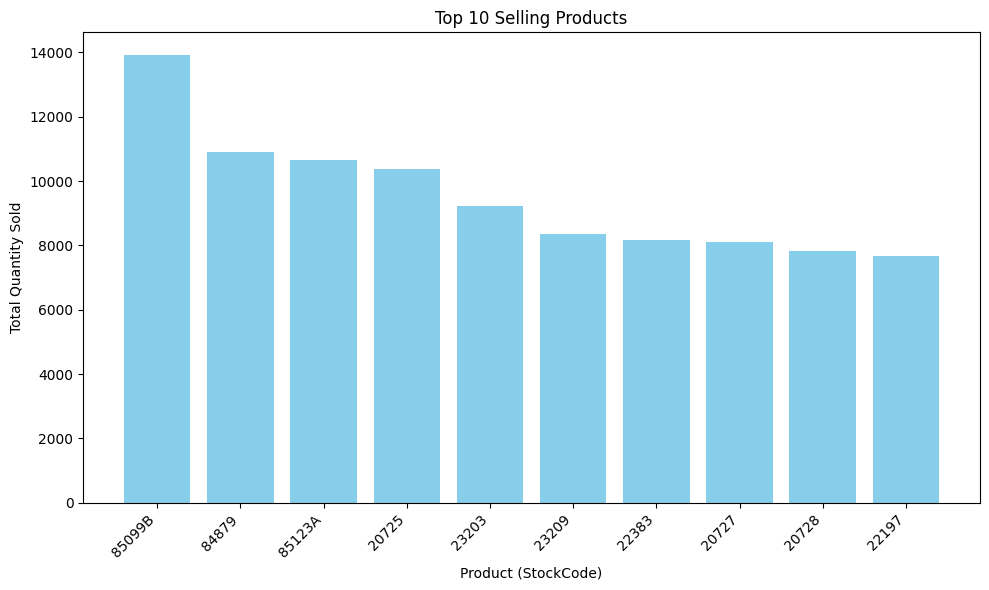

In [90]:


# Assuming 'top_selling_products' is your DataFrame
top_selling_products = newdff.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).reset_index()

# Get the top 10 selling products
top_10 = top_selling_products.head(10)

# Create a bar plot for the top 10 selling products
plt.figure(figsize=(10, 6))
plt.bar(top_10['StockCode'], top_10['Quantity'], color='skyblue')

# Add labels and title
plt.xlabel('Product (StockCode)')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 Selling Products')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


In [91]:
# Assuming 'StockCode' represents the product category
category_sales = newdff.groupby(['yearly', 'StockCode'])['Quantity'].sum().reset_index()

# Sort to find the product category with the most sales for each year
category_sales_sorted = category_sales.sort_values(by=['yearly', 'Quantity'], ascending=[True, False])

print(category_sales_sorted) 


     yearly StockCode  Quantity
2221   2010    85123A      1078
1567   2010     22961       916
847    2010     22086       904
1166   2010     22469       835
1524   2010     22910       751
...     ...       ...       ...
5521   2011    84750A       -13
5703   2011    85017A       -13
5593   2011    84872A       -15
6280   2011         S       -16
3030   2011     21361       -17

[6283 rows x 3 columns]


In [92]:
# revenue by country region
countrywise_sales= newdff.groupby('Country')['Total_spending'].sum().sort_values(ascending=False)
print(countrywise_sales)

Country
United Kingdom          4084425.704
Germany                  120057.780
France                   105150.310
EIRE                      99910.620
Spain                     26390.270
Switzerland               25580.510
Belgium                   25337.810
Portugal                  18753.560
Norway                    14055.200
Netherlands               11711.420
Italy                     11479.180
Channel Islands           10636.330
Australia                 10120.370
Finland                    9428.750
Cyprus                     7002.980
Austria                    5767.190
Denmark                    5267.400
Singapore                  4261.080
Poland                     4182.920
Sweden                     4051.130
Hong Kong                  3925.890
Israel                     3433.440
Unspecified                3355.140
Greece                     2878.510
Iceland                    2866.770
Canada                     1670.600
Malta                      1325.880
United Arab Emirates

In [93]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim # geopy is used to get latitude and longi of each country and nominatim is api which provide service for requesting from server named OpenStreetMap server.
                                    # and this server returns lat and log of each countries
# Assuming you already have the countrywise_sales data
countrywise_sales = newdff.groupby('Country')['Total_spending'].sum().sort_values(ascending=False)

# Convert to a DataFrame
country_sales_df = countrywise_sales.reset_index()
country_sales_df.columns = ['Country', 'Total_Spending']

# Initialize Geolocator
geolocator = Nominatim(user_agent="geoapiExercisesbuddy")  # we are creating object named geolocotor also creating different id to identify us from server

# Function to get latitude and longitude
def get_lat_long(country):
    try:
        location = geolocator.geocode(country)
        return location.latitude, location.longitude
    except:
        return None, None

# Create new columns for Latitude and Longitude
country_sales_df['Latitude'] = country_sales_df['Country'].apply(lambda x: get_lat_long(x)[0])
country_sales_df['Longitude'] = country_sales_df['Country'].apply(lambda x: get_lat_long(x)[1])

# Remove rows with missing coordinates
country_sales_df.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# Initialize a Folium map centered around a global location
map_revenue = folium.Map(location=[20, 0], zoom_start=2)

# Add country markers to the map
for index, row in country_sales_df.iterrows(): # iterrows() gives values of each countries like country name in index and pandas series( o whole row of cols,revenue,coordinates)
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],# it is used to access the values from row which we discussed above
        radius=row['Total_Spending'] / 1e6,  # Adjust radius for visibility , here we are dividing from 100000
        color='blue',
        fill=True,
        fill_color='green',
        fill_opacity=0.6,
        popup=f"{row['Country']}: ${row['Total_Spending']:,.2f}"
    ).add_to(map_revenue)

# Show the map
map_revenue.save("Countrywise_Revenue_Map.html")
map_revenue


In [94]:
 # now will remove some insights from outliers
# first will find top 5%  vip customers from our outliers

outlierdf['revenue']= outlierdf['Quantity']*outlierdf['UnitPrice']
outlierdf.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


In [95]:
# calculate total spending by each customer
customer_total_spendings= outlierdf.groupby('CustomerID')['revenue'].sum()
print(customer_total_spendings)

CustomerID
-1.0        355747.54
 12346.0         0.00
 12347.0      1212.18
 12348.0      1780.24
 12349.0       471.35
              ...    
 18274.0       -14.22
 18276.0        83.40
 18277.0         6.96
 18282.0        13.92
 18287.0      1231.80
Name: revenue, Length: 3619, dtype: float64


In [96]:
# now set the threshhold for top 5%
threshhold_value=customer_total_spendings.quantile(0.95)
print(threshhold_value)

2693.0039999999985


In [97]:
vip_customer=customer_total_spendings[customer_total_spendings>=threshhold_value]
nonvip_customer=customer_total_spendings[customer_total_spendings<threshhold_value]
print(vip_customer)

CustomerID
-1.0        355747.54
 12357.0      3316.66
 12409.0      9286.12
 12415.0    120176.11
 12433.0      7951.90
              ...    
 18102.0    251917.33
 18139.0      7549.62
 18172.0      3946.24
 18198.0      3210.14
 18251.0      4314.72
Name: revenue, Length: 181, dtype: float64


In [98]:
num_of_vip =vip_customer.count()
num_of_normal= nonvip_customer.count()
print(num_of_vip)
print(num_of_normal)

181
3438


In [99]:
#During which months vips make the most purchases.
vipdf= outlierdf[outlierdf['CustomerID'].isin(vip_customer.index)]

In [100]:
vipdf.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,90.0


In [101]:
vipdf['monthyear']= vipdf['InvoiceDate'].dt.to_period('M')
monthly_vip_sales= vipdf.groupby('monthyear')['revenue'].sum()


C:\Users\admin\AppData\Local\Temp\ipykernel_12420\1520124074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vipdf['monthyear']= vipdf['InvoiceDate'].dt.to_period('M')


In [102]:
# Group by product categories and calculate total spending
product_sales = outlierdf.groupby('StockCode')['revenue'].sum().sort_values(ascending=False)

print(product_sales.head(10))  # Top 10 product categories


StockCode
DOT       206065.97
22423      81185.95
85123A     65171.36
85099B     60121.77
23084      56985.79
47566      54800.20
22086      43569.68
22197      43011.28
22502      41670.00
84879      39765.11
Name: revenue, dtype: float64


In [103]:
outlierdf['monthyear']=outlierdf['InvoiceDate'].dt.to_period('M')  

In [104]:
outlierdf.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue,monthyear
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,2010-12


In [105]:
monthly_outlier_sales= outlierdf.groupby('monthyear')['revenue'].sum()

In [106]:
monthly_outlier_sales.head(2)

monthyear
2010-12    316696.85
2011-01    222295.14
Freq: M, Name: revenue, dtype: float64

In [137]:
# Convert customer_segments Series to a DataFrame
customer_segments_df = customer_segments.reset_index()

# Rename columns for clarity
customer_segments_df.columns = ['CustomerID', 'Segment']


In [141]:
customer_spending_df= customer_spending.reset_index()
customer_spending_df.columns  =    ['CustomerID','Total_spending']


In [143]:
# Combine customer spending DataFrame with customer segment DataFrame
combined_df = pd.merge(customer_spending_df, customer_segments_df, on='CustomerID', how='left')
combined_df

,CustomerID,Total_spending,Segment
0,-1.0,838188.95,Very High
1,12347.0,2866.77,Very High
2,12348.0,17.00,Low
3,12349.0,1155.75,Very High
4,12350.0,274.00,Medium
...,...,...,...
4195,18280.0,160.70,Medium
4196,18281.0,46.92,Low
4197,18282.0,111.68,Medium
4198,18283.0,2002.63,Very High


In [145]:
# Extract relevant columns from newdff
date_df = newdff[['CustomerID', 'monthyear']]

# Merge with the combined DataFrame
final_df = pd.merge(combined_df, date_df, on='CustomerID', how='left')


In [157]:
final_df

,CustomerID,Total_spending,Segment,monthyear
0,-1.0,838188.95,Very High,2010-12
1,-1.0,838188.95,Very High,2010-12
2,-1.0,838188.95,Very High,2010-12
3,-1.0,838188.95,Very High,2010-12
4,-1.0,838188.95,Very High,2010-12
...,...,...,...,...
439130,18287.0,571.48,High,2011-10
439131,18287.0,571.48,High,2011-10
439132,18287.0,571.48,High,2011-10
439133,18287.0,571.48,High,2011-10


In [176]:
very_high_segment = final_df[final_df['Segment'] == 'Very High']
very_high_segment

,CustomerID,Total_spending,Segment,monthyear
0,-1.0,838188.95,Very High,2010-12
1,-1.0,838188.95,Very High,2010-12
2,-1.0,838188.95,Very High,2010-12
3,-1.0,838188.95,Very High,2010-12
4,-1.0,838188.95,Very High,2010-12
...,...,...,...,...
439098,18283.0,2002.63,Very High,2011-12
439099,18283.0,2002.63,Very High,2011-12
439100,18283.0,2002.63,Very High,2011-12
439101,18283.0,2002.63,Very High,2011-12


In [174]:
trend_analysis = very_high_segment.groupby('monthyear')['Total_spending'].sum().astype(int)


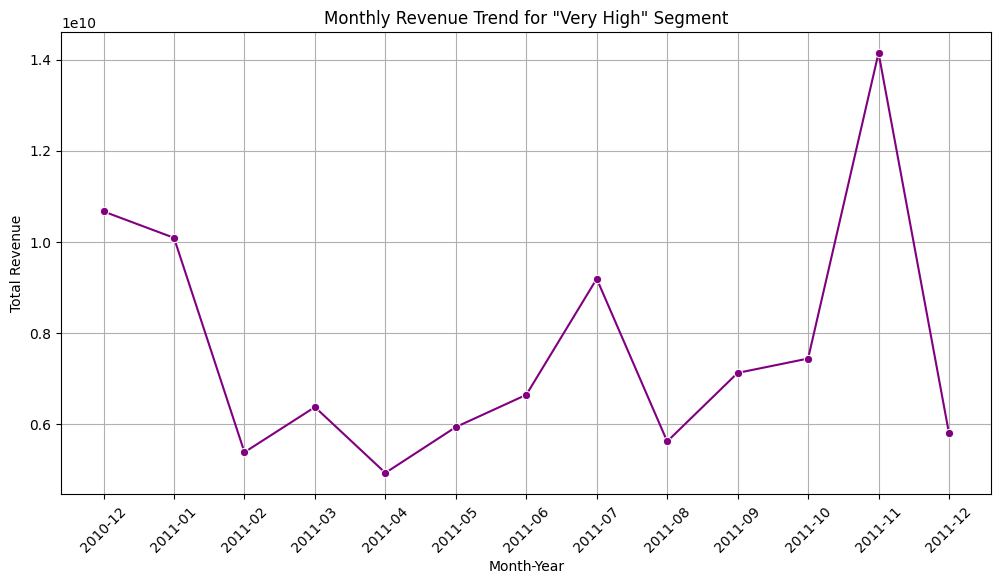

In [173]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=trend_analysis.index.astype(str), y=trend_analysis.values.astype(int), marker='o', color='purple')
plt.xticks(rotation=45)
plt.title('Monthly Revenue Trend for "Very High" Segment')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

In [218]:
newdff.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_spending,monthyear,yearly
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,2010-12,2010


In [179]:
county_df = newdff[['CustomerID', 'Country']]

# Merge with the combined DataFrame
final_dff = pd.merge(combined_df, county_df, on='CustomerID', how='left')

In [180]:
final_dff

,CustomerID,Total_spending,Segment,Country
0,-1.0,838188.95,Very High,United Kingdom
1,-1.0,838188.95,Very High,United Kingdom
2,-1.0,838188.95,Very High,United Kingdom
3,-1.0,838188.95,Very High,United Kingdom
4,-1.0,838188.95,Very High,United Kingdom
...,...,...,...,...
439130,18287.0,571.48,High,United Kingdom
439131,18287.0,571.48,High,United Kingdom
439132,18287.0,571.48,High,United Kingdom
439133,18287.0,571.48,High,United Kingdom


In [185]:
customer_count_by_country = final_dff.groupby('Country')['CustomerID'].nunique()
customer_count_by_country.sort_values(ascending=False)

Country
United Kingdom          3793
Germany                   93
France                    87
Spain                     29
Belgium                   25
Switzerland               22
Portugal                  20
Italy                     15
Finland                   12
Austria                   11
Norway                    10
Australia                  9
Sweden                     8
Denmark                    8
Cyprus                     7
Channel Islands            7
Netherlands                7
Poland                     5
Unspecified                5
Japan                      5
Greece                     4
USA                        4
EIRE                       4
Israel                     4
Canada                     3
Bahrain                    2
Malta                      2
United Arab Emirates       2
Brazil                     1
Czech Republic             1
Lebanon                    1
Iceland                    1
Hong Kong                  1
European Community         1
Saudi 

In [200]:
# Filter for very high segment customers (without specifying countries)
high_value_customers = final_dff[final_dff['Segment'] == 'Very High']
# Group by country and count the number of unique customers in each country
unique_customers_by_country = high_value_customers.groupby('Country')['CustomerID'].nunique()

# Sort the result in descending order
sorted_customer_count_by_country = unique_customers_by_country.sort_values(ascending=False)

print(sorted_customer_count_by_country)


Country
United Kingdom     918
Germany             35
France              27
Switzerland         11
Belgium             10
Portugal             7
Norway               6
Spain                6
Italy                5
Austria              4
Australia            4
EIRE                 4
Channel Islands      4
Finland              3
Cyprus               2
Poland               2
Denmark              2
Israel               2
Netherlands          2
Canada               1
Greece               1
Hong Kong            1
Iceland              1
Lithuania            1
Singapore            1
Sweden               1
Unspecified          1
Name: CustomerID, dtype: int64


In [255]:
regul_highvalue_cust=   pd.merge(final_dff,regular_cust_df ,on='CustomerID',how='right')

In [263]:
regul_highvalue_cust.head(2)

,CustomerID,Total_spending,Segment,Country,total_order_value,total_orders
0,-1.0,838188.95,Very High,United Kingdom,838188.95,2341
1,-1.0,838188.95,Very High,United Kingdom,838188.95,2341


In [257]:
# countries with high value and reg customers 
highvaluecust= regul_highvalue_cust[regul_highvalue_cust['Segment'] == 'Very High']
specialcust=  highvaluecust.groupby('Country')['CustomerID'].nunique()
specialcust= specialcust.sort_values(ascending=False)


In [259]:
specialcust

Country
United Kingdom     917
Germany             35
France              27
Belgium             10
Switzerland          8
Portugal             7
Norway               6
Spain                6
Austria              4
Australia            4
Channel Islands      4
EIRE                 4
Italy                4
Denmark              2
Poland               2
Finland              2
Cyprus               2
Netherlands          2
Canada               1
Hong Kong            1
Iceland              1
Israel               1
Lithuania            1
Singapore            1
Sweden               1
Unspecified          1
Name: CustomerID, dtype: int64

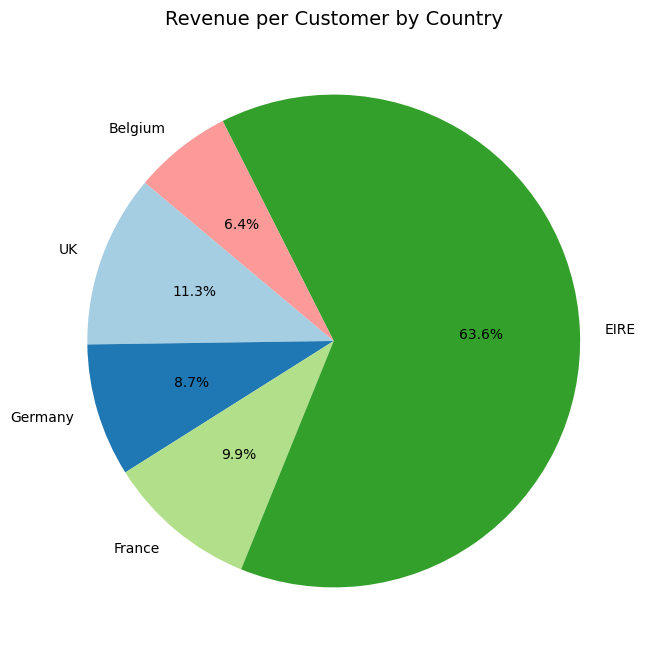

In [262]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
countries = ['UK', 'Germany', 'France', 'EIRE', 'Belgium']
revenues = [4084425, 120057, 105150, 99910, 25337]
customers = [917, 35, 27, 4, 10]

# Create a DataFrame
data = pd.DataFrame({
    'Country': countries,
    'Revenue': revenues,
    'Customers': customers
})

# Calculate Revenue per Customer
data['Revenue per Customer'] = data['Revenue'] / data['Customers']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(data['Revenue per Customer'], labels=data['Country'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Add title
plt.title('Revenue per Customer by Country', fontsize=14)

# Display the pie chart
plt.show()


In [267]:
highvaluecust = highvaluecust.join(newdff['StockCode'], how='left')


In [286]:
highvaluecust.head(1)

,CustomerID,Total_spending,Segment,Country,total_order_value,total_orders,StockCode
0,-1.0,838188.95,Very High,United Kingdom,838188.95,2341,85123A


In [282]:
Topcust_buying_category= highvaluecust.groupby(['CustomerID','StockCode','Country'])['total_orders'].sum()